In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import numpy as np
import gsw 

from T_S_diagram import ts_diagram

from data_loading import get_LADCP, get_SADCP,get_2021_CTD_data


In [2]:
# Load the data from the file
year = 2021

SADCP = get_SADCP(year)
LADCP = get_LADCP(year)
CTD = get_2021_CTD_data()

/Users/georgiamcquade/Desktop/MOCIS/M2 - S2/FOET/FOET_Northern_Gyre/data_loading.py:76: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds = xr.Dataset(


## Comparing paths for CTD , SADCP and LADCP

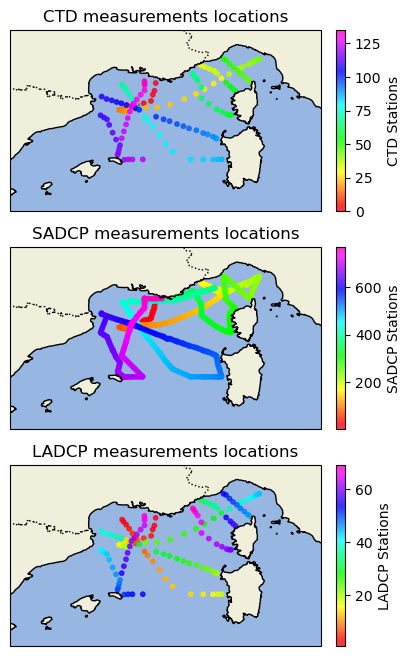

In [3]:
fig, ax = plt.subplots(3,1,figsize=(10,8),subplot_kw={'projection': ccrs.PlateCarree()})
ax.flatten()

sc = ax[0].scatter (CTD['longitude'],CTD['latitude'], s=10, c=CTD['idx'], cmap='gist_rainbow', alpha=0.8)
ax[0].set_extent([0, 12, 38, 45])
ax[0].add_feature(cfeature.LAND)
ax[0].add_feature(cfeature.COASTLINE)
ax[0].add_feature(cfeature.OCEAN)
ax[0].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[0], orientation='vertical', pad=0.02)
cbar.set_label('CTD Stations')
ax[0].set_title('CTD measurements locations')


sc = ax[1].scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8)
ax[1].set_extent([0, 12, 38, 45])
ax[1].add_feature(cfeature.LAND)
ax[1].add_feature(cfeature.COASTLINE)
ax[1].add_feature(cfeature.OCEAN)
ax[1].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[1], orientation='vertical', pad=0.02)
cbar.set_label('SADCP Stations')
ax[1].set_title('SADCP measurements locations')


sc = ax[2].scatter (LADCP['longitude'],LADCP['latitude'], s=10, c=LADCP['idx'], cmap='gist_rainbow', alpha=0.8)
ax[2].set_extent([0, 12, 38, 45])
ax[2].add_feature(cfeature.LAND)
ax[2].add_feature(cfeature.COASTLINE)
ax[2].add_feature(cfeature.OCEAN)
ax[2].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[2], orientation='vertical', pad=0.02)
cbar.set_label('LADCP Stations')
ax[2].set_title('LADCP measurements locations')

plt.show()

## Choosing a path that passes through the front for SADCP

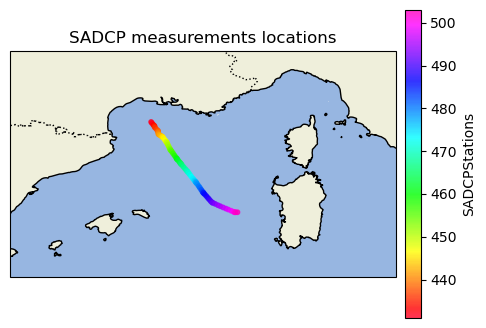

In [96]:
fig, ax = plt.subplots(1,1,figsize=(6,4),subplot_kw={'projection': ccrs.PlateCarree()})

N0 = 430
N1 = 503
sc = ax.scatter (SADCP['longitude'][N0:N1],SADCP['latitude'][N0:N1], s=10, c=SADCP['idx'][N0:N1], cmap='gist_rainbow', alpha=0.8)
ax.set_extent([0, 12, 38, 45])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCPStations')
ax.set_title('SADCP measurements locations')

plt.show()

In [97]:
Coupe1 = SADCP.where((SADCP['idx'] > N0) & (SADCP['idx'] < N1), drop=True)
Coupe1

<xarray.Dataset> Size: 86kB
Dimensions:    (idx: 72, depth: 72)
Coordinates:
  * idx        (idx) int64 576B 431 432 433 434 435 436 ... 498 499 500 501 502
  * depth      (depth) uint16 144B 20 28 36 44 46 ... 1126 1150 1174 1198 1222
    latitude   (idx) float64 576B 42.81 42.77 42.72 42.69 ... 40.02 40.0 40.0
    longitude  (idx) float64 576B 4.388 4.417 4.459 4.488 ... 6.949 6.984 7.008
    time       (idx) datetime64[ns] 576B 2021-06-23T09:49:58 ... 2021-06-25T0...
    leg        (idx) float64 576B 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0 2.0
Data variables:
    U          (idx, depth) float64 41kB 0.03509 0.06851 ... 0.01733 -0.03534
    V          (idx, depth) float64 41kB -0.01637 -0.06943 ... -0.04607 -0.05506
Attributes:
    year:     2021
    source:   MOOSE cruises

## Hovmöller Diagrams (speeds / (depth and stations))

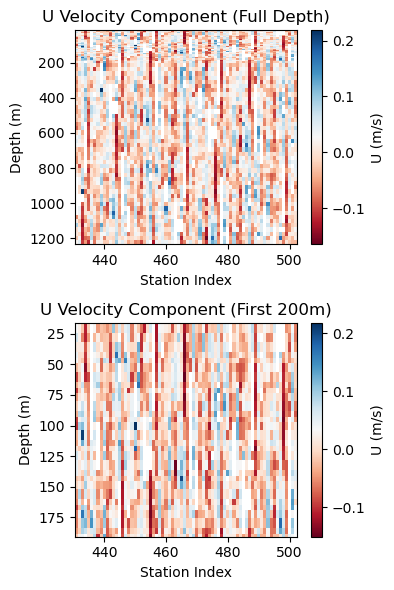

In [98]:
fig, ax = plt.subplots(2, 1, figsize=(4, 6))

# Plot for the entire depth range
c = ax[0].pcolormesh(Coupe1['idx'], Coupe1['depth'], Coupe1['U'].T, cmap='RdBu', shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('U Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('U (m/s)')
ax[0].invert_yaxis()

# Plot for the first 200 meters
depth_200m = Coupe1.sel(depth=slice(0, 200))
c = ax[1].pcolormesh(depth_200m['idx'], depth_200m['depth'], depth_200m['U'].T, cmap='RdBu', shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('U Velocity Component (First 200m)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('U (m/s)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


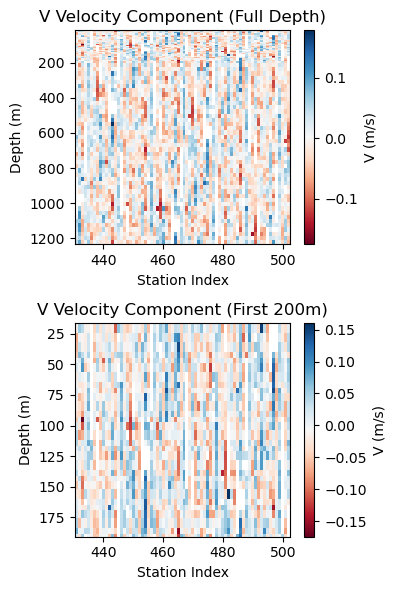

In [99]:
fig, ax = plt.subplots(2, 1, figsize=(4, 6))

# Plot for the entire depth range
c = ax[0].pcolormesh(Coupe1['idx'], Coupe1['depth'], Coupe1['V'].T, cmap='RdBu', shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('V Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('V (m/s)')
ax[0].invert_yaxis()

# Plot for the first 200 meters
depth_200m = Coupe1.sel(depth=slice(0, 200))
c = ax[1].pcolormesh(depth_200m['idx'], depth_200m['depth'], depth_200m['V'].T, cmap='RdBu', shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('V Velocity Component (First 200m)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('V (m/s)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

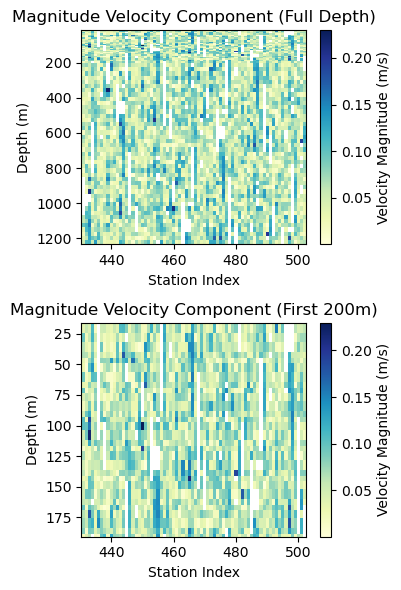

In [100]:
fig, ax = plt.subplots(2, 1, figsize=(4, 6))

# Plot for the entire depth range
c = ax[0].pcolormesh(Coupe1['idx'], Coupe1['depth'], np.sqrt(Coupe1['U'].T**2 + Coupe1['V'].T**2), cmap='YlGnBu', shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Magnitude Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('Velocity Magnitude (m/s)')
ax[0].invert_yaxis()

# Plot for the first 200 meters
depth_200m = Coupe1.sel(depth=slice(0, 200))
c = ax[1].pcolormesh(depth_200m['idx'], depth_200m['depth'], np.sqrt(depth_200m['U'].T**2 + depth_200m['V'].T**2), cmap='YlGnBu', shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('Magnitude Velocity Component (First 200m)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('Velocity Magnitude (m/s)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

# mhhhhh

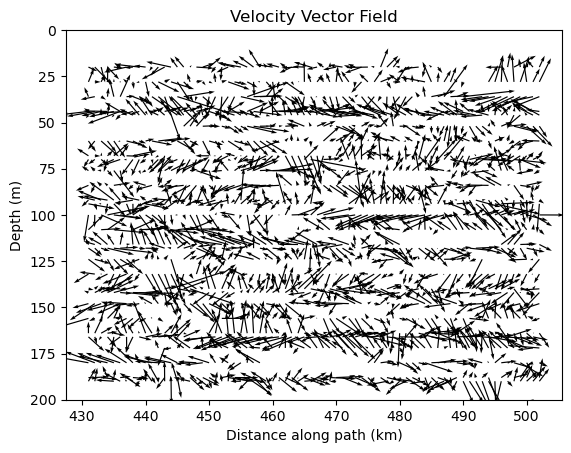

In [106]:
plt.figure()
plt.quiver(Coupe1['idx'], Coupe1['depth'], Coupe1['U'],Coupe1['V'], scale=2)
plt.gca().invert_yaxis()
plt.xlabel('Distance along path (km)')
plt.ylabel('Depth (m)')
plt.ylim(200, 0)
plt.title('Velocity Vector Field')
plt.show()